<a href="https://colab.research.google.com/github/hasmira0105/Public-repo/blob/main/3rd_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount drive to collab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Preprocessing dataset and deploy apply image augmentation

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation = ImageDataGenerator(rescale=1/255)


training_dataset = train.flow_from_directory(
    '/content/drive/MyDrive/Dataset1/Train',
    target_size = (300, 300),
    batch_size = 50,
    class_mode = 'categorical'
)

validation_dataset = validation.flow_from_directory(
    '/content/drive/MyDrive/Dataset1/Validation',
    target_size = (300, 300),
    batch_size = 50,
    class_mode = 'categorical'
)

Found 2000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


Creating the model

In [3]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

Compile the model

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train the dataset

In [5]:
history = model.fit(
    training_dataset,
    steps_per_epoch = 8,
    epochs = 200,
    verbose = 1,
    validation_data = validation_dataset,
    validation_steps = 2
)

Epoch 1/200
8/8 [==============================] - 212s 23s/step - loss: 13.5303 - accuracy: 0.2500 - val_loss: 4.2127 - val_accuracy: 0.2100
Epoch 2/200
8/8 [==============================] - 149s 19s/step - loss: 2.2205 - accuracy: 0.2300 - val_loss: 1.5299 - val_accuracy: 0.3000
Epoch 3/200
8/8 [==============================] - 111s 14s/step - loss: 1.5876 - accuracy: 0.1975 - val_loss: 1.4888 - val_accuracy: 0.4000
Epoch 4/200
8/8 [==============================] - 81s 10s/step - loss: 1.5526 - accuracy: 0.3050 - val_loss: 1.4868 - val_accuracy: 0.3400
Epoch 5/200
8/8 [==============================] - 65s 8s/step - loss: 1.4866 - accuracy: 0.3650 - val_loss: 1.3413 - val_accuracy: 0.4200
Epoch 6/200
8/8 [==============================] - 57s 7s/step - loss: 1.5223 - accuracy: 0.3625 - val_loss: 1.3594 - val_accuracy: 0.5000
Epoch 7/200
8/8 [==============================] - 48s 6s/step - loss: 1.4347 - accuracy: 0.3900 - val_loss: 1.2637 - val_accuracy: 0.5100
Epoch 8/200
8/8 [==

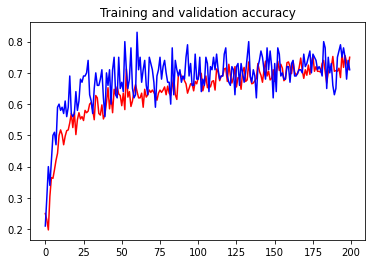

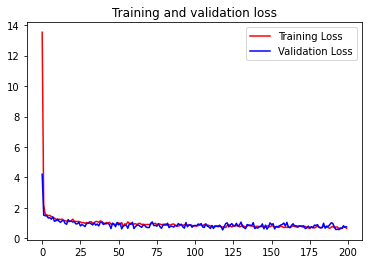

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()